# Econometría básica con Python
## Supuestos sobre la estructura del modelo

**Fabián Alejandro Triana Alarcón**

fatrianaa1@gmail.com / fatrianaa@unal.edu.co

Economista. Estudiante de Especialización en Estadística

Universidad Nacional de Colombia

## Teorema de Gauss-Markov

Los estimadores de MCO presentan una serie de propiedades estadísticas atractivas dados unos supuestos;
tal afirmación se sustenta en el **Teorema de Gauss-Markov**, el cual, siguiendo a Gujarati y Porter (2010), puede
expresarse como: "Dados los supuestos del modelo clásico de regresión lineal, los estimadores de mínimos
cuadrados, dentro de la clase de estimadores lineales insesgados, tienen varianza mínima, es decir, son MELI"
(p. 72).

MELI (BLUE en inglés) hace referencia a "Mejores Estimadores Lineales Insesgados" y es la calificación que
adquieren los estimadores de MCO cuando se cumple con los supuestos del modelo clásico de regresión lineal,
también conocido como modelo de Gauss o modelo estándar de regresión lineal.

El modelo clásico de regresión lineal plantea, de acuerdo a Gujarati y Porter (2010), los siguientes supuestos:



1.   Se trata de un modelo de regresión lineal, es decir, lineal en los parámetros.
2.   Valores fijos de $x$ o valores de $x$ independientes del término de error. Esto significa que se requiere covarianza 0 entre $u_i$ y cada variable $x_{ji}$. Es decir $cov(u_i, x_{ji}) = 0$ $\forall$ $i, j$
3. Valor medio de la perturbación $u_i$ igual a 0. $E(u_i) = 0$ $\forall$ $i$
4. Homoscedasticidad o varianza constante de $u_i$. Esto es, $Var(u_i) = \sigma^2$ $\forall$ $i$
5. No autocorrelación, o correlación serial, entre las perturbaciones. Es decir, $cov(u_i
, u_j) = 0$ $\forall$ $i \neq j$
6. El número de observaciones $n$ debe ser mayor que el de parámetros por estimar. Si se tiene $k$ variables
explicativas (sin incluir el intercepto), entonces debe estimarse $k + 1$ parámetros (para una regresión
con término del intercepto), por lo tanto, en tal caso, $n > k + 1$
7. Debe haber variación en los valores de las variables $x$.
8. No debe haber colinealidad exacta entre las variables $x$.
9. No hay sesgo de especificación, es decir, el modelo está correctamente especificado.


## Supuestos sobre la estructura del modelo:

Al examinar los supuestos del modelo clásico de regresión lineal se observa que estos se pueden clasificar en dos categorías: supuestos sobre la estructura y supuestos sobre el término de error, en cuanto algunos de estos supuestos hacen referencia explícita a la ecuación y el comportamiento de los datos mientras otros tratan sobre la naturaleza de las perturbaciones. Es posible verificar el cumplimiento de algunos de estos supuestos en Python utilizando
funciones propias de algunas librerías especializadas como *Statsmodels*.

Se estimará un modelo de regresión lineal múltiple y se verificará el cumplimiento de los supuestos sobre
la estructura del mismo. El dataset que se empleará será, al igual que en secciones previas, el del Ejemplo
7.1, *Mortalidad infantil en relación con el PIB per cápita y la tasa de alfabetización de las mujeres*, de Gujarati y Porter (2010).

### Preparación del entorno:

En primer lugar, se procederá a importar las herramientas requeridas para llevar a cabo las tareas necesarias:

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Todas las librerías importadas han sido empleadas en secciones previas exceptuando por una: *statsmodels.stats.api*. La importación de esta nueva librería es fundamental para nuestra labor, pues es donde están contenidas la mayoría de funciones que se emplearán, sin las cuales no sería posible verificar fácilmente el cumplimiento de los supuestos del modelo clásico de regresión lineal. En este punto hay que ser cuidadosos pues se importan tanto *statsmodels.api* como *statsmodels.stats.api*, lo que puede generar confusiones posteriores si no se tiene claridad sobre las mismas y el papel que desempeña cada una.

### Importación de los datos:

In [2]:
data = pd.read_csv("GujaratiPorter71.txt", delimiter= "\t")
data.head()

,CM,FLR,PGNP,TFR
0,128,37,1870,6.66
1,204,22,130,6.15
2,202,16,310,7.00
3,197,65,570,6.25
4,96,76,2050,3.81


El ``DataFrame`` contiene información de las siguientes variables:

* **CM**. Esta variable hace referencia a *Child Mortality* y corresponde a la mortalidad infantil. Se trata del número de fallecimientos, en un año, de niños con una edad inferior a 5 años por cada 1000 nacidos vivos.

* **FLR**. Esta variable hace referencia a *Female Literacy Rate* y corresponde a la tasa de alfabetización de las mujeres.

* **PGNP** hace referencia a *Per cápita Gross National Product* y corresponde al PIB per cápita en 1980.

* **TFR** hace referencia a *Total Fertility Rate* y corresponde a la tasa de fecundidad total.

## Supuesto de número de observaciones mayor a número de parámetros (Supuesto #6)

Uno de los supuestos sobre la estructura del modelo es que el número de observaciones ($n$) con el cual se realiza
la estimación debe superar el número de parámetros ($\beta$) a ser estimados. Si pretendemos trabajar con todas
las observaciones del ``DataFrame``, basta con examinar sus dimensiones para determinar la cantidad máxima
de parámetros que podría estimarse. Las dimensiones de un ``DataFrame`` corresponden al número de filas y
columnas por los cuales está formado y pueden conocerse muy fácilmente: basta con emplear el atributo ``.shape``, así:

In [3]:
data.shape

(64, 4)

El resultado que obtenemos es una tupla Python (...) que informa que nuestro ``DataFrame`` es de tamaño
$64 \times 4$, por lo que posee 64 filas y 4 columnas. Considerando que cada fila corresponde a una observación y
cada columna a una variable, el número máximo de parámetros a estimar es 63.

¿Qué sucede si el número de observaciones es inferior al número de parámetros a estimar? "Si hay menos
de $k$ observaciones entonces $X$ no puede ser de rango completo" (Greene, 2003, p. 14). Debido a esto, cuando
el número de parámetros a estimar excede el número de observaciones disponibles para hacer la estimación,
se obtiene que la varianza es infinita, por lo cual el método MCO no puede emplearse (James, Witten, Hastie, y
Tibshirani, 2013).

A modo de ejemplo, se realizará una regresión de prueba, con fines puramente ilustrativos, en la que se
usarán solo 3 observaciones para estimar 4 parámetros. Para esto, se seleccionarán únicamente las tres primeras
observaciones del ``DataFrame`` recurriendo a los corchetes [ ]:

In [4]:
Modelo_de_Prueba = sm.OLS(data["CM"][0:3],sm.add_constant(data[["FLR", "PGNP", "TFR"]][0:3]))
Resultados_de_Prueba = Modelo_de_Prueba.fit()
print(Resultados_de_Prueba.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                nan
Time:                        22:57:03   Log-Likelihood:                 66.198
No. Observations:                   3   AIC:                            -126.4
Df Residuals:                       0   BIC:                            -129.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2453        inf          0        n

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


Como se puede observar, los errores estándar son infinitos, y los *p-values* e intervalos de confianza no
están definidos, por lo que no resulta útil emplear los estimadores de MCO cuando el número de observaciones
es inferior al número de parámetros que se pretende estimar.

Ciertamente, el ejemplo que se acaba de presentar es muy sencillo; sin embargo, es posible que el dataset
a emplear tenga un gran número de variables explicativas, incluso muy superior a la cantidad de observaciones
disponibles, por lo cual el Supuesto #6, a pesar de su apariencia inocente, no debe ser tomado a la ligera.

Cuando existen muchas más variables explicativas que observaciones se puede recurrir a diversas técnicas
y se pueden llevar a cabo procesos de selección de variables con el propósito de lidiar con tal situación. 

## Supuesto de variación en los valores de las variables explicativas (Supuesto #7)
El supuesto #7 indica que las variables explicativas deben ser "variables"; es decir, que los valores de las
variables explicativas deben cambiar entre observaciones, no pueden corresponder a la misma constante. Intuitivamente, para que una variable explicativa sea "explicativa" sus cambios deben asociarse a cambios en la variable dependiente; si el valor de una variable explicativa no cambia, resulta difícil identificar la manera como está asociada con la variable dependiente y, por ende, cuantificar la relación.

Identificar el cumplimiento de este supuesto es bastante sencillo: "si la desviación estándar muestral de las
$x_i$ es cero, entonces el supuesto no se satisface; si no es así, este supuesto se satisface" (Wooldridge, 2010, p.
48).

Para verificar en Python el cumplimiento del supuesto de variabilidad en las variables, se puede emplear,
por ejemplo, el método ``.apply()``, utilizando como argumento la función ``std(...)`` de *NumPy*:

In [5]:
data.apply(np.std)

CM        75.382151
FLR       25.803873
PGNP    2704.317439
TFR        1.497158
dtype: float64

De manera más sencilla, puede simplemente recurrirse a la función ``std(...)`` de *NumPy* utilizando el `DataFrame` como argumento:

In [6]:
np.std(data)

CM        75.382151
FLR       25.803873
PGNP    2704.317439
TFR        1.497158
dtype: float64

O, de forma alternativa, con un proceso más elaborado, puede usarse un *for loop*: 

In [7]:
for columna in data.columns:
  print(columna, np.std(data[columna]))

CM 75.38215140203947
FLR 25.8038726502438
PGNP 2704.31743929961
TFR 1.4971576912081606


Cualquiera de los procedimientos empleados previamente lleva al mismo resultado, en el que se puede observar que ninguna variable presenta una desviación estándar de cero, por lo que, en efecto, se trata de variables y no constantes. A modo de ejemplo, si a los datos se les añade una columna en la que todas las observaciones corresponden al número 3, se puede observar que en este escenario una de las variables presenta una desviación estándar de cero, lo que indica que sus valores no cambian: 

In [8]:
data["Constante"] = 3
print(np.std(data))
data.drop(columns = ["Constante"], inplace = True)

CM             75.382151
FLR            25.803873
PGNP         2704.317439
TFR             1.497158
Constante       0.000000
dtype: float64


En este caso, la varianza de la variable llamada "Constante" es de cero, por lo que sus valores nunca varían y no podría emplearse en el modelo de regresión pues sería absorbida por completo en el término del intercepto o simplemente correspondería al término del intercepto si éste no está incluido en la ecuación. 

## Supuesto de No multicolinealidad (Supuesto # 8)

Uno de los supuestos sobre la estructura del modelo es que no se presenta colinealidad exacta entre las
variables explicativas. La colinealidad, de acuerdo a
Dormann et al. (2013), "describe la situación en la cual dos o más variables predictoras en un modelo estadístico
están linealmente relacionadas" (p. 28).

Un método para detectar colinealidad entre variables es calcular el coeficiente de correlación simple entre
pares de estas; si alguno de estos coeficientes es mayor, en valor absoluto, a 0.9, entonces hay síntoma de
colinealidad muy fuerte.

Para examinar la correlación entre las variables numéricas de un ``DataFrame`` de *pandas*, es posible emplear
el método `.corr()`. Así:

In [9]:
data.corr()

,CM,FLR,PGNP,TFR
CM,1.000000,-0.818285,-0.407697,0.671135
FLR,-0.818285,1.000000,0.268530,-0.625954
PGNP,-0.407697,0.268530,1.000000,-0.185718
TFR,0.671135,-0.625954,-0.185718,1.000000


Si se requiere una representación un tanto más "rica" visualmente, se puede recurrir a la función
`heatmap(...)` de *Seaborn*, la cual dibuja una matriz codificada por color. El argumento a pasar a la función,
para este caso específico, es la matriz de correlaciones, la cual, tal y como hemos apenas visto, es obtenida con
la aplicación del método `.corr()` sobre el `DataFrame`.
El código a emplear es el siguiente:

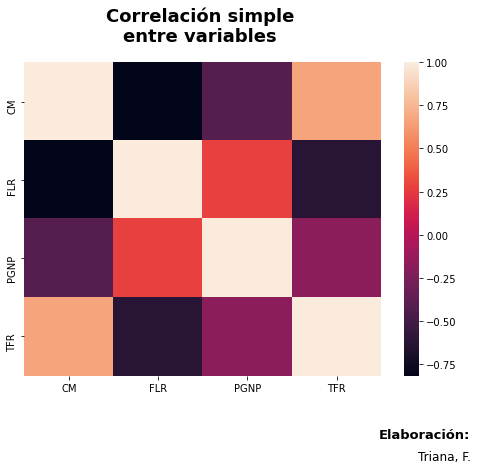

In [10]:
fig, ax = plt.subplots(figsize = (8, 6))
fig.suptitle("Correlación simple\nentre variables",
             fontsize = 18,
             fontweight = "bold", x = 0.43)
sns.heatmap(data.corr(), ax = ax)
plt.subplots_adjust(top = 0.85)
fig.text(.9,-.02, "Elaboración:",
         fontsize = 13, fontweight = "bold",
         ha = "right")
fig.text(.9,-.07,"Triana, F.",
         fontsize = 12, ha = "right")
plt.show()

Podemos observar que la escala de color usada por defecto por la función `heatmap(...)` de *Seaborn* no
parece ser la más adecuada. Es posible modificar esto incluyendo un valor específico para el parámetro *cmap*,
asignando la escala que nos parezca la más indicada. A modo de ejemplo, en el siguiente código se empleará la
escala "RdYlGn" (rojos, amarillos, verdes):

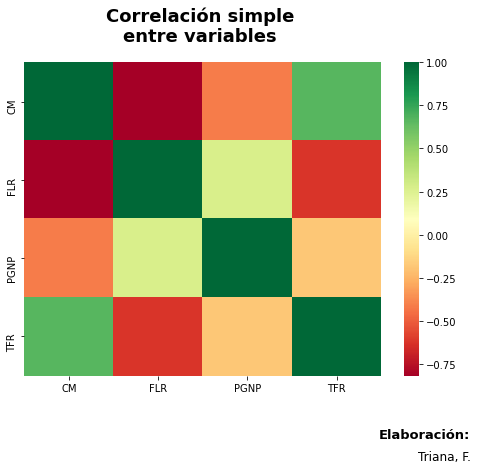

In [11]:
fig, ax = plt.subplots(figsize = (8, 6))
fig.suptitle("Correlación simple\nentre variables",
             fontsize = 18,
             fontweight = "bold", x = 0.43)
sns.heatmap(data.corr(), ax = ax, cmap = "RdYlGn")
plt.subplots_adjust(top = 0.85)
fig.text(.9,-.02, "Elaboración:",
         fontsize = 13, fontweight = "bold",
         ha = "right")
fig.text(.9,-.07,"Triana, F.",
         fontsize = 12, ha = "right")
plt.show()

Si consideramos que nuestro gráfico aún no es lo suficientemente informativo, podemos agregar el coeficiente de correlación simple correspondiente a cada una de las celdas. Para alcanzar tal objetivo, debemos incluir el parámetro *annot* en la función `heatmap(...)` de *Seaborn* y asignarle el valor de `True` (*annot* es un
parámetro de tipo booleano). Así:

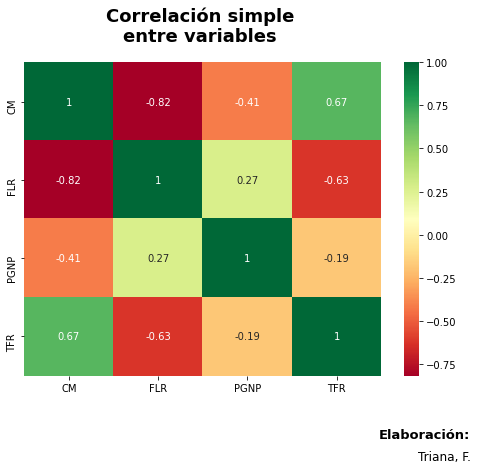

In [12]:
fig, ax = plt.subplots(figsize = (8, 6))
fig.suptitle("Correlación simple\nentre variables",
             fontsize = 18,
             fontweight = "bold", x = 0.43)
sns.heatmap(data.corr(), ax = ax, cmap = "RdYlGn", annot = True)
plt.subplots_adjust(top = 0.85)
fig.text(.9,-.02, "Elaboración:",
         fontsize = 13, fontweight = "bold",
         ha = "right")
fig.text(.9,-.07,"Triana, F.",
         fontsize = 12, ha = "right")
plt.show()

Así, notamos que la correlación más fuerte se presenta entre las variables "CM" y "FLR", con un coeficiente
superior a 0.8 (en valor absoluto); sin embargo, tal magnitud del coeficiente no debe ser una preocupación
mayor, en cuanto el Supuesto #8 se refiere a colinealidad entre variables *explicativas* y la variable "CM" es la
variable *dependiente*, mientras que "FLR" es una variable explicativa.

El Supuesto #8 hace referencia a colinealidad exacta; esto es cuando una variable explicativa tiene una relación lineal exacta con otra. Cuando se presenta colinealidad exacta, los coeficientes de regresión son indeterminados y los errores estándar son infinitos (Gujarati y Porter, 2010).

En nuestro caso específico, ninguna de las variables explicativas presenta una correlación muy fuerte con
alguna otra variable explicativa distinta a ella misma, por lo tanto, no se presenta multicolinealidad perfecta y
es posible estimar los parámetros.

Otra técnica útil para detectar multicolinealidad es por medio del Factor de Inflación de Varianza (VIF,
por sus siglas en inglés). "VIFs altos reflejan un incremento en las varianzas de los coeficientes de regresión
estimados debido a colinealidad entre variables predictoras, en comparación con las que se obtendrían cuando
las predictoras son ortogonales" (Murray, Nguyen, Lee, Remmenga, y Smith, 2012).

Así, en caso de que no haya multicolinealidad, o ésta sea leve, se espera que la magnitud de los VIFs sea
pequeña y entre más fuerte sea la colinealidad más alto será el VIF; Gujarati y Porter (2010), basados en el
trabajo de Kleinbaum, Kupper y Muller (1988), sugieren una regla práctica: "si el FIV [VIF] de una variable es
superior a 10 (esto sucede si $R_{j}^2$ excede 0.90), se dice que esa variable es muy colineal" (p.340).

¿Cuáles son los VIFs de las variables del dataset con el que se está trabajando? Para obtener estos valores,
se hará uso de la función ``variance_inflation_factor(...)`` del módulo *stats.outliers_influence*
de la librería *Statsmodels*.

La función ``variance_inflation_factor(...)`` recibe dos argumentos: la matriz que contiene las variables explicativas (*exog*) y un índice (*exog_idx*) que señala qué variable es a la que corresponde el VIF calculado.

Esta función calcula el VIF para la variable señalada; sin embargo, es de interés conocer el VIF de cada una de
las variables explicativas.

Es posible aplicar la función ``variance_inflation_factor(...)`` de forma "manual" tantas veces como variables de interés haya; para nuestro caso, hay 3 variables explicativas, por lo que la función solo debe aplicarse 3 veces: una operación que no es excesivamente tediosa. Sin embargo, si se tuviera un número apreciable de variables explicativas, resultaría molesto repetir la operación en múltiples ocasiones, por lo que resulta útil poder "automatizar" tal tarea. Una opción para lograr esto es utilizar un ciclo ``for``:

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = sm.add_constant(data[["FLR", "PGNP", "TFR"]])
for i in range(len(X.columns)):
    variable = X.columns[i]
    vif = variance_inflation_factor(X.values, i)
    print(variable, vif)

const 45.21718387655253
FLR 1.7118453475892694
PGNP 1.078305947361206
TFR 1.6451503926767397


Si se desea obtener una presentación más "elaborada" del resultado, puede construirse un ``DataFrame`` de *pandas*:

In [14]:
vif = []
rango = X.shape[1]
for i in range(rango):
    vif.append(variance_inflation_factor(X.values, i))
tabla = pd.DataFrame({"VIF": vif}, index = X.columns)
tabla

,VIF
const,45.217184
FLR,1.711845
PGNP,1.078306
TFR,1.645150


Así, se puede observar que ninguna de las variables explicativas exhibe un VIF elevado, por lo que no se
sugiere que alguna de estas variables sea muy colineal. Este resultado está en línea con lo que se obtuvo en la
matriz de correlaciones, en la cual se encontró que ninguno de los coeficientes de correlación simple era muy
alto.

## Referencias:
Dormann, C.F., Elith, J., Bacher, S., Buchmann, C., Gudrun, C., Carré, G., García, J.R., Gruber, B., Lafourcade,
B., Leitão, P.J., Münkemüller, T., McClean, C., Osborne, P.E., Reineking, B., Schröder, B., Skidmore, A.K.,
Zurell, D., y Lautenbach, S. (2013). Collinearity: a review of methods to deal with it and a simulation
study evaluating their performance. *Ecograpghy*, 36, 27-46. doi: 10.1111/j.1600-0587.2012.07348.x

Gujarati, D.N. y Porter, D.C. (2010). *Econometría*. México: McGraw-Hill/Interamericana Editores, S.A. de C.V.

Greene, W.H. (2003). *Econometric Analysis*. New Jersey, Estados Unidos: Pearson Education, Inc.

James, G., Witten, D., Hastie, T., y Tibshirani, R. (2013). *An Introduction to Statistical Learning with Applications in R*. doi: 10.1007/978-1-4614-7138-7

Murray, L., Nguyen, H., Lee, Y-F., Remmenga, M., y Smith, D.W. (2012). Variance Inflation Factors in Regression Models with dummy variables. *Conference on Applied Statistics in Agriculture*. doi: 10.4148/2475-7772.1034

Wooldridge, J.M. (2010). *Introducción a la econometría. Un enfoque moderno*. México: Cengage Learning
Editores, S.A. de C.V.